In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
alpha = 2
beta = 0.4
sigma2 = 1
x = np.linspace(0, 10, n)


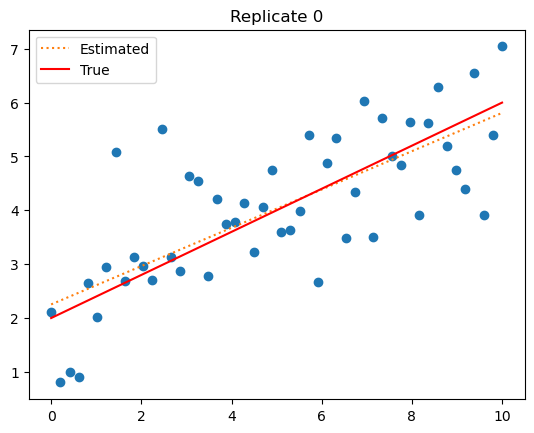

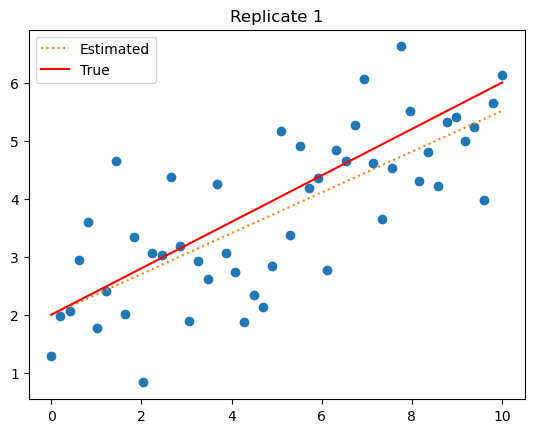

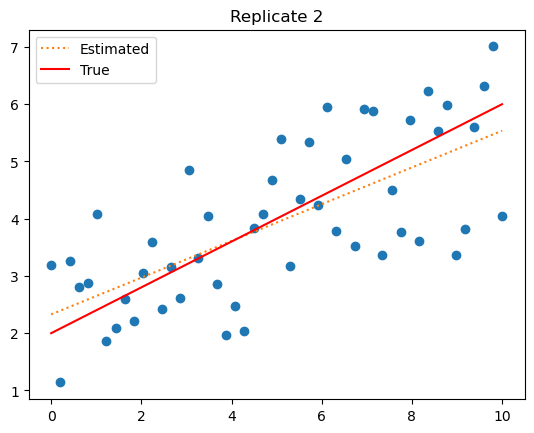

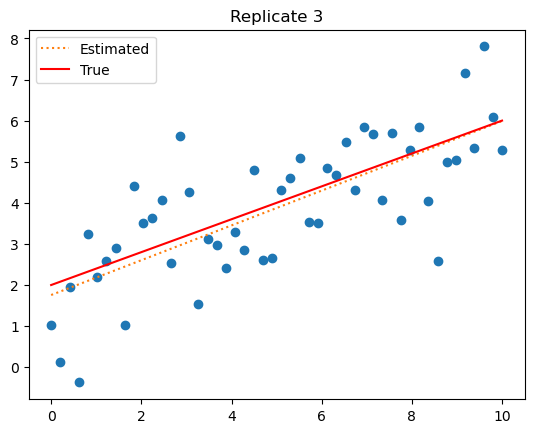

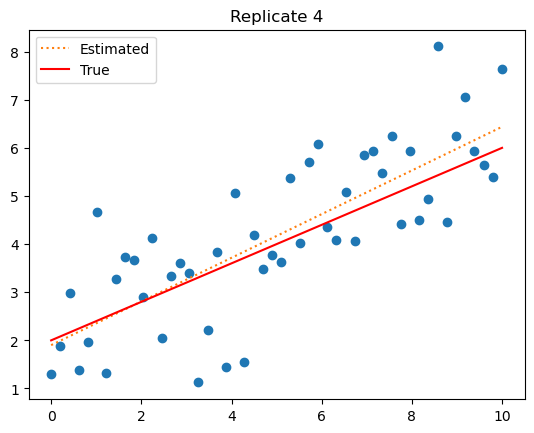

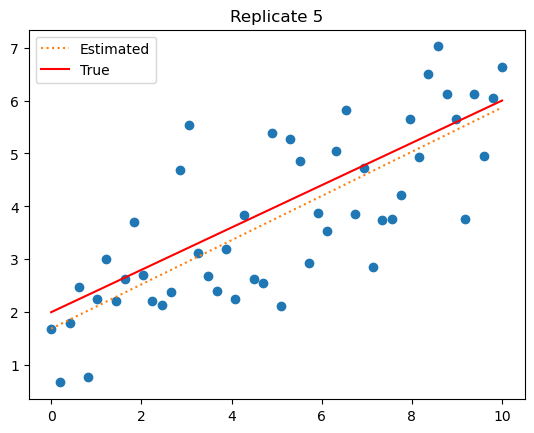

In [2]:
Nsamples = 10000
beta_hat = np.zeros(Nsamples)
alpha_hat = np.zeros(Nsamples)
sigma2_hat = np.zeros(Nsamples)


for i in range(Nsamples):
    epsilon = np.random.normal(0, np.sqrt(sigma2), n)
    y = alpha + beta * x + epsilon
    beta_hat[i] = np.sum((x - np.mean(x)) * y) / np.sum((x - np.mean(x))**2)
    alpha_hat[i] = np.mean(y) - beta_hat[i] * np.mean(x)
    sigma2_hat[i] = sum((y - alpha_hat[i] - beta_hat[i] * x)**2)/n
    if i < 6:
        plt.figure()
        plt.plot(x, y, "o")
        plt.plot(x, alpha_hat[i] + beta_hat[i] * x, linestyle='dotted', label='Estimated')
        plt.plot(x, alpha + beta * x, color='red', label='True')
        plt.title(f'Replicate {i}')
        plt.legend()
        plt.show()


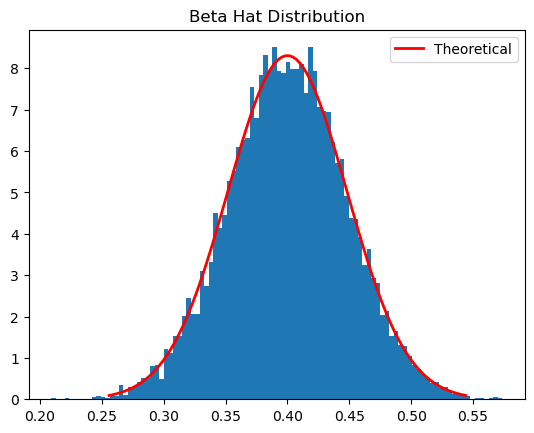

In [3]:
teo_beta_hat_mean = beta
teo_beta_hat_var = sigma2 / np.sum((x - np.mean(x))**2)

beta_grid = np.linspace(teo_beta_hat_mean - 3 * np.sqrt(teo_beta_hat_var),
                        teo_beta_hat_mean + 3 * np.sqrt(teo_beta_hat_var),
                        100)
plt.figure()
plt.hist(beta_hat, density=True, bins=100)
plt.plot(beta_grid, np.exp(-(beta_grid - teo_beta_hat_mean)**2 / (2 * teo_beta_hat_var)) /
         (np.sqrt(2 * np.pi * teo_beta_hat_var)), 'r-', linewidth=2, label='Theoretical')
plt.title('Beta Hat Distribution')
plt.legend()
plt.show()

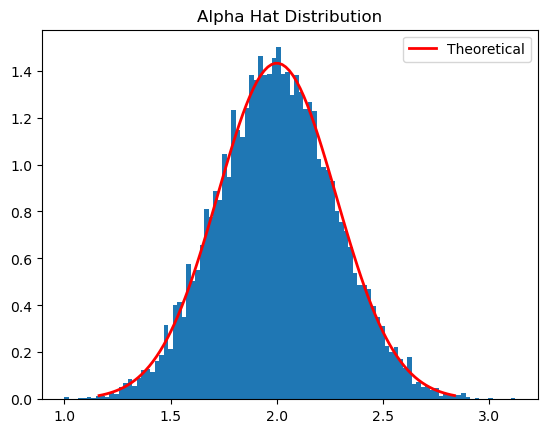

In [4]:
teo_alpha_hat_mean = alpha
teo_alpha_hat_var = np.sum(x**2) / (n * np.sum((x - np.mean(x))**2))

alpha_grid = np.linspace(teo_alpha_hat_mean - 3 * np.sqrt(teo_alpha_hat_var),
                         teo_alpha_hat_mean + 3 * np.sqrt(teo_alpha_hat_var),
                         100)
plt.figure()
plt.hist(alpha_hat, density=True, bins = 100)
plt.plot(alpha_grid, np.exp(-(alpha_grid - teo_alpha_hat_mean)**2 / (2 * teo_alpha_hat_var)) /
         (np.sqrt(2 * np.pi * teo_alpha_hat_var)), 'r-', linewidth=2, label='Theoretical')
plt.title('Alpha Hat Distribution')
plt.legend()
plt.show()

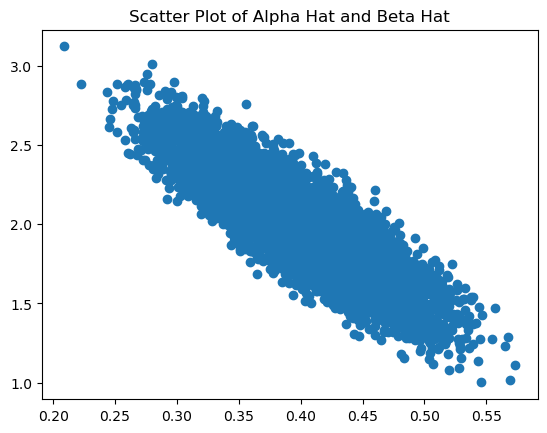

Sample Covariance of Alpha Hat and Beta Hat: -0.0114
Theoretical Covariance of Alpha Hat and Beta Hat: -0.0115


In [5]:
plt.figure()
plt.scatter(beta_hat, alpha_hat)
teo_cov_alpha_hat_beta_hat = -np.mean(x) * sigma2 / np.sum((x - np.mean(x))**2)
sample_cov_alpha_hat_beta_hat = np.cov(alpha_hat, beta_hat)[0, 1]
plt.title('Scatter Plot of Alpha Hat and Beta Hat')
plt.show()

print(f"Sample Covariance of Alpha Hat and Beta Hat: {sample_cov_alpha_hat_beta_hat:.4f}")
print(f"Theoretical Covariance of Alpha Hat and Beta Hat: {teo_cov_alpha_hat_beta_hat:.4f}")


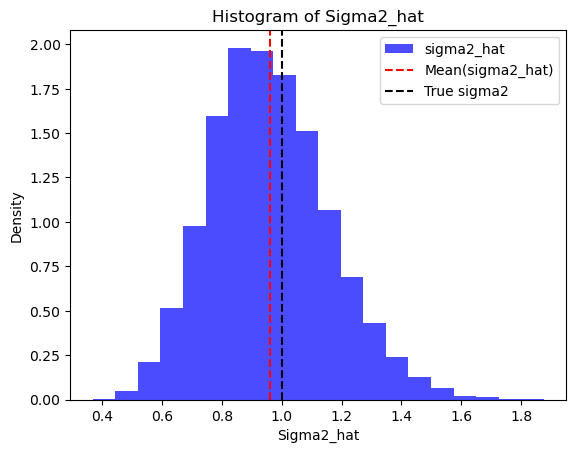

In [6]:

# Plot a histogram of sigma2_hat
plt.hist(sigma2_hat, bins=20, density=True, color='blue', alpha=0.7, label='sigma2_hat')
plt.axvline(x=np.mean(sigma2_hat), color='red', linestyle='dashed', label='Mean(sigma2_hat)')
plt.axvline(x=sigma2, color='black', linestyle='dashed', label='True sigma2')
plt.xlabel('Sigma2_hat')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Sigma2_hat')
plt.show()

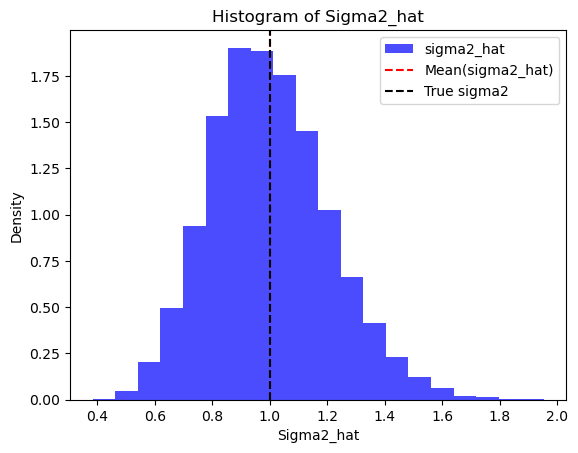

In [7]:
# Plot a histogram of S2
S2 = n/(n-2)*sigma2_hat
plt.hist(S2, bins=20, density=True, color='blue', alpha=0.7, label='sigma2_hat')
plt.axvline(x=np.mean(S2), color='red', linestyle='dashed', label='Mean(sigma2_hat)')
plt.axvline(x=sigma2, color='black', linestyle='dashed', label='True sigma2')
plt.xlabel('Sigma2_hat')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Sigma2_hat')
plt.show()